# A. Business Background

**Company X** is an Indonesian investment startup that offers a platform for buying and selling mutual funds, including stock mutual funds, bond mutual funds, money market mutual funds, and mixed-investment mutual funds. To gain insights into user preferences and identify any patterns within the demographic and daily transaction data, I have conducted thorough data cleaning, manipulation, exploratory data analysis (EDA), and descriptive analysis of the dataset.

The main objective of this analysis is to **identify any discernible trends** or patterns within the data that can inform the development of effective marketing campaigns for the next month. By analyzing user behavior and preferences, I aim to tailor the marketing strategies to the specific needs and interests of the company's target audience, ultimately increasing engagement and driving growth for the business. Through this data analysis efforts, I hope to gain valuable insights that can inform our decision-making and optimize our marketing efforts to deliver the greatest possible impact.

> **User Dataset:** https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0


> **User Daily Transaction Dataset:** https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0


> **Data Dictionary:** https://docs.google.com/spreadsheets/d/1yenHlMpXHUoct3MfbGrF3IVH7GBSKvRafjF2YnRVlkQ/edit?usp=sharing


# B. Data Preparation

## a. Importing Libraries

In [1]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
import matplotlib.pyplot as plt     # To perform data visualization
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization

## b. Importing Datasets

In [2]:
# Importing User data

user_url = 'https://docs.google.com/spreadsheets/d/1Y4EdCS6DgdflozgD38mMZf3L9_CG8AYXvNQ6mA5Nrr8/edit#gid=0'
user_url_trf = user_url.replace('/edit#gid=', '/export?format=csv&gid=')
df1 = pd.read_csv(user_url_trf)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [3]:
# Importing daily_user_transcation data

transaction_url = 'https://docs.google.com/spreadsheets/d/1pM6N_8z_-n2GOLmHNr5pAR9OcfV2cyL5-UIf7L3yfPE/edit#gid=0'
transaction_url_trf = transaction_url.replace('/edit#gid=', '/export?format=csv&gid=')
df2 = pd.read_csv(transaction_url_trf)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

# C. Data Cleaning

## a. User

### **1. Handling Missing Values**

In [4]:
# Calculating the total rows with missing values on each columns in User data (df1)

df1.isna().sum()

user_id                            0
registration_import_datetime       0
user_gender                        0
user_age                           0
user_occupation                    0
user_income_range                  0
referral_code_used              9108
user_income_source                 0
end_of_month_invested_amount       0
total_buy_amount                   0
total_sell_amount                  0
dtype: int64

**Insight:**


*   9108 null values in 'referral_code_used' column
*   The null values in column referral_code_used will be replaced as "Did not use referral" as the blank values indicate that those users did not use a referral code

In [5]:
# Firstly, copy the dataset to a new variable

df_user = df1.copy()

In [6]:
# Replace NaN values in 'referral_code_used' column

df_user.referral_code_used = df_user.referral_code_used.fillna('Did not use referral')

df_user.isna().sum()

user_id                         0
registration_import_datetime    0
user_gender                     0
user_age                        0
user_occupation                 0
user_income_range               0
referral_code_used              0
user_income_source              0
end_of_month_invested_amount    0
total_buy_amount                0
total_sell_amount               0
dtype: int64

In [7]:
df_user['referral_code_used'].value_counts()

Did not use referral    9108
used referral           5604
Name: referral_code_used, dtype: int64

*No more missing values are found in the user dataset*

> **Treatment for 0 values**
Since they may affect during outlier removal

In [8]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            14712 non-null  object
 7   user_income_source            14712 non-null  object
 8   end_of_month_invested_amount  14712 non-null  int64 
 9   total_buy_amount              14712 non-null  int64 
 10  total_sell_amount             14712 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [9]:
# Select columns where I want to exclude 0 values
cols_to_exclude = ['end_of_month_invested_amount', 'total_buy_amount', 'total_sell_amount']

In [10]:
# Replace 0 values with NaN values
df_user[cols_to_exclude] = df_user[cols_to_exclude].mask(df_user[cols_to_exclude] == 0, pd.NA)

In [11]:
# Drop rows with NaN values
df_user.dropna(subset=cols_to_exclude, inplace=True)

In [12]:
df_user['total_buy_amount'].value_counts()

100000.0      39
10000.0       31
25000.0       27
500000.0      27
200000.0      27
              ..
29979.0        1
283000.0       1
360000.0       1
860500.0       1
31040000.0     1
Name: total_buy_amount, Length: 396, dtype: int64

### **2. Check Data Type**

In [13]:
# Show the overall info of the dataset
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 8 to 14691
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       730 non-null    int64  
 1   registration_import_datetime  730 non-null    object 
 2   user_gender                   730 non-null    object 
 3   user_age                      730 non-null    int64  
 4   user_occupation               730 non-null    object 
 5   user_income_range             730 non-null    object 
 6   referral_code_used            730 non-null    object 
 7   user_income_source            730 non-null    object 
 8   end_of_month_invested_amount  730 non-null    float64
 9   total_buy_amount              730 non-null    float64
 10  total_sell_amount             730 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 68.4+ KB


**Insight:**


*   The type of column 'user_id' can be changed into string, since an ID is generally not used for calculation
*   The type of column 'registration_import_datetime' can be changed into datetime

In [14]:
# Set the type of column 'user_id' into string
df_user['user_id'] = df_user['user_id'].astype('str')

In [15]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 8 to 14691
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       730 non-null    object 
 1   registration_import_datetime  730 non-null    object 
 2   user_gender                   730 non-null    object 
 3   user_age                      730 non-null    int64  
 4   user_occupation               730 non-null    object 
 5   user_income_range             730 non-null    object 
 6   referral_code_used            730 non-null    object 
 7   user_income_source            730 non-null    object 
 8   end_of_month_invested_amount  730 non-null    float64
 9   total_buy_amount              730 non-null    float64
 10  total_sell_amount             730 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 68.4+ KB


*Column 'user_id' has been transformed into string type*

In [16]:
# Set the type of column 'registration_import_datetime' into datetime
df_user['registration_import_datetime'] = pd.to_datetime(df_user['registration_import_datetime'])

df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 8 to 14691
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       730 non-null    object        
 1   registration_import_datetime  730 non-null    datetime64[ns]
 2   user_gender                   730 non-null    object        
 3   user_age                      730 non-null    int64         
 4   user_occupation               730 non-null    object        
 5   user_income_range             730 non-null    object        
 6   referral_code_used            730 non-null    object        
 7   user_income_source            730 non-null    object        
 8   end_of_month_invested_amount  730 non-null    float64       
 9   total_buy_amount              730 non-null    float64       
 10  total_sell_amount             730 non-null    float64       
dtypes: datetime64[ns](1), float64(

*Column 'registration_import_datetime' has been transformed into datetime type*

### **3. Check for Typos**

In [17]:
df_user.columns

Index(['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount'],
      dtype='object')

In [18]:
for col_name in ['user_id', 'registration_import_datetime', 'user_gender', 'user_age',
       'user_occupation', 'user_income_range', 'referral_code_used',
       'user_income_source', 'end_of_month_invested_amount',
       'total_buy_amount', 'total_sell_amount']:
    print(df_user[col_name].value_counts(), '\n')

3783302    1
3830273    1
3825589    1
3847861    1
3788293    1
          ..
3809741    1
3828848    1
3898954    1
3868456    1
3765807    1
Name: user_id, Length: 730, dtype: int64 

2021-08-10 20:40:29    2
2021-08-11 15:52:30    2
2021-09-06 07:35:51    2
2021-08-14 11:38:07    2
2021-09-20 23:51:14    2
                      ..
2021-08-09 00:25:17    1
2021-08-21 13:00:52    1
2021-08-15 10:06:23    1
2021-08-25 07:24:30    1
2021-08-05 23:30:18    1
Name: registration_import_datetime, Length: 716, dtype: int64 

Male      473
Female    257
Name: user_gender, dtype: int64 

21    69
20    47
23    44
19    44
24    41
26    40
25    40
22    40
18    35
27    35
28    31
29    27
32    22
31    20
30    20
33    19
35    14
17    13
34    13
39    11
36    11
37    10
42    10
43     9
45     8
41     8
38     6
48     5
50     4
44     4
40     4
46     3
49     3
47     3
51     2
52     2
53     2
59     2
54     2
56     2
57     2
55     1
62     1
58     1
Name: user_age, d

In [19]:
#Checking the values for user_gender
df_user[df_user.columns[2]].value_counts()

Male      473
Female    257
Name: user_gender, dtype: int64

*It seems like there is no typo detected in each columns in the dataframe*

### **4. Data Manipulation**

#### Creating a bin for column 'user_income_range'

In [20]:
# To check the unique values
df_user['user_income_range'].value_counts()

< 10 Juta                   297
Rp 10 Juta - 50 Juta        222
> Rp 50 Juta - 100 Juta     134
> Rp 100 Juta - 500 Juta     66
> Rp 500 Juta - 1 Miliar     10
> Rp 1 Miliar                 1
Name: user_income_range, dtype: int64

In [21]:
a = df_user['user_income_range'] # To make the code shorter and easier to read

In [22]:
# I decide to categorize the income range into three groups. Coded as follows:

df_user.loc[(a == '< 10 Juta') | (a == 'Rp 10 Juta - 50 Juta'), 'user_income_range'] = 'Lower Income'
df_user.loc[(a == '> Rp 50 Juta - 100 Juta') | (a == '> Rp 100 Juta - 500 Juta'), 'user_income_range'] = 'Middle Income'
df_user.loc[(a == '> Rp 500 Juta - 1 Miliar') | (a == '> Rp 1 Miliar'), 'user_income_range'] = 'Higher Income'

In [23]:
df_user['user_income_range'].value_counts()    #To confirm the data after creating the categories

Lower Income     519
Middle Income    200
Higher Income     11
Name: user_income_range, dtype: int64

In [24]:
# Copy the dataset for later analysis
users = df_user.copy()

#### Assigning user age into age groups

In [25]:
# First, sort and count the user age to see the age distribution

df_age = df_user['user_age']
age_sorted_counts= df_age.value_counts().sort_index(ascending =False)
age_sorted_counts

62     1
59     2
58     1
57     2
56     2
55     1
54     2
53     2
52     2
51     2
50     4
49     3
48     5
47     3
46     3
45     8
44     4
43     9
42    10
41     8
40     4
39    11
38     6
37    10
36    11
35    14
34    13
33    19
32    22
31    20
30    20
29    27
28    31
27    35
26    40
25    40
24    41
23    44
22    40
21    69
20    47
19    44
18    35
17    13
Name: user_age, dtype: int64

In [26]:
# I decide to categorize the user age into three groups. Coded as follows:
df_user_copy= df_user.copy()

df_user.loc[(df_age >= 17 ) & (df_age <= 30 ), 'user_age'] = 'Young Adult'
df_user.loc[(df_age >= 31 ) & (df_age <= 60 ), 'user_age'] = 'Adult'
df_user.loc[(df_age >= 61 ), 'user_age'] = 'Older Adult'

In [27]:
df_user['user_age'].value_counts()

Young Adult    526
Adult          203
Older Adult      1
Name: user_age, dtype: int64

In [28]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 8 to 14691
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       730 non-null    object        
 1   registration_import_datetime  730 non-null    datetime64[ns]
 2   user_gender                   730 non-null    object        
 3   user_age                      730 non-null    object        
 4   user_occupation               730 non-null    object        
 5   user_income_range             730 non-null    object        
 6   referral_code_used            730 non-null    object        
 7   user_income_source            730 non-null    object        
 8   end_of_month_invested_amount  730 non-null    float64       
 9   total_buy_amount              730 non-null    float64       
 10  total_sell_amount             730 non-null    float64       
dtypes: datetime64[ns](1), float64(

**Assigning User Occupations**

In [29]:
# To check the unique values
df_user['user_occupation'].value_counts()

Pelajar       395
Swasta        185
Others         67
Pengusaha      28
IRT            26
PNS            19
Guru            7
TNI/Polisi      3
Name: user_occupation, dtype: int64

In [30]:
# replace the values in the user_occupation column that contain the strings 'Pengusaha', 'PNS', 'Guru', 'IRT', 'TNI/Polisi' with 'Others'
df_user['user_occupation'] = df_user['user_occupation'].replace(['Pengusaha','PNS', 'Guru', 'IRT', 'TNI/Polisi'], 'Others')

In [31]:
df_user['user_occupation'].value_counts()

Pelajar    395
Swasta     185
Others     150
Name: user_occupation, dtype: int64

### 5. Check for Duplicates

In [32]:
#Check the duplicate
df_user[df_user['user_id'].duplicated()]

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,total_sell_amount


This output displays that there are no duplicated rows in the dataframe.

### User Cleaned Data

In [33]:
df_users = df_user.copy() #Create a copy after cleaning for other purposes in the future

In [34]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 8 to 14691
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   user_id                       730 non-null    object        
 1   registration_import_datetime  730 non-null    datetime64[ns]
 2   user_gender                   730 non-null    object        
 3   user_age                      730 non-null    object        
 4   user_occupation               730 non-null    object        
 5   user_income_range             730 non-null    object        
 6   referral_code_used            730 non-null    object        
 7   user_income_source            730 non-null    object        
 8   end_of_month_invested_amount  730 non-null    float64       
 9   total_buy_amount              730 non-null    float64       
 10  total_sell_amount             730 non-null    float64       
dtypes: datetime64[ns](1), float64(

## b. Daily_user_transaction

### 1. Handling Missing Values

In [35]:
# Firstly, copy the dataset to a new variable
df_transac = df2.copy()

df_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

In [36]:
# Calculating the total rows with missing values on each columns in daily_user_transaction table (df_transac)

df_transac.isna().sum()

user_id                                          0
date                                             0
buy_saham_transaction_amount                 59780
sell_saham_transaction_amount               157003
buy_pasar_uang_transaction_amount            36548
sell_pasar_uang_transaction_amount          156801
buy_pendapatan_tetap_transaction_amount      59895
sell_pendapatan_tetap_transaction_amount    157230
buy_campuran_transaction_amount             153739
sell_campuran_transaction_amount            158765
total_buy_transaction_amount                     0
total_sell_transaction_amount                    0
saham_invested_amount                        52519
pasar_uang_invested_amount                   27730
pendapatan_tetap_invested_amount             52865
campuran_invested_amount                    153459
total_invested_amount                            0
dtype: int64

**Insight:**


> Null values in transaction table are more likely to happen as for one user_id can either make one or more types of trasaction or not make any transaction. For example, not making any transaction at date x and selling & buying Saham pendapatan tetap on the next day. Therefore, the null values are not removed.

### **2. Check Data Type**

In [37]:
# Show the overall info of the dataset
df_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  int64  
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

**Insight:**


*   The type of column 'user_id' can be changed into string, since an ID is generally not used for calculation
*   The type of column 'date' can be changed into datetime

In [38]:
# Set the type of column 'user_id' into string
df_transac['user_id'] = df_transac['user_id'].astype('str')

df_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   user_id                                   158811 non-null  object 
 1   date                                      158811 non-null  object 
 2   buy_saham_transaction_amount              99031 non-null   float64
 3   sell_saham_transaction_amount             1808 non-null    float64
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64
 8   buy_campuran_transaction_amount           5072 non-null    float64
 9   sell_campuran_transaction_amount          46 non-null      float64
 10  total_buy_transactio

*Column 'user_id' has been transformed into string type*

In [39]:
# Set the type of column 'date' into datetime

df_transac['date'] = pd.to_datetime(df_transac['date'])

df_transac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   user_id                                   158811 non-null  object        
 1   date                                      158811 non-null  datetime64[ns]
 2   buy_saham_transaction_amount              99031 non-null   float64       
 3   sell_saham_transaction_amount             1808 non-null    float64       
 4   buy_pasar_uang_transaction_amount         122263 non-null  float64       
 5   sell_pasar_uang_transaction_amount        2010 non-null    float64       
 6   buy_pendapatan_tetap_transaction_amount   98916 non-null   float64       
 7   sell_pendapatan_tetap_transaction_amount  1581 non-null    float64       
 8   buy_campuran_transaction_amount           5072 non-null    float64       
 9   sell_campuran_t

*Column 'date' has been transformed into datetime type*

### 3. Check for Typos

In [40]:
df_transac.columns

Index(['user_id', 'date', 'buy_saham_transaction_amount',
       'sell_saham_transaction_amount', 'buy_pasar_uang_transaction_amount',
       'sell_pasar_uang_transaction_amount',
       'buy_pendapatan_tetap_transaction_amount',
       'sell_pendapatan_tetap_transaction_amount',
       'buy_campuran_transaction_amount', 'sell_campuran_transaction_amount',
       'total_buy_transaction_amount', 'total_sell_transaction_amount',
       'saham_invested_amount', 'pasar_uang_invested_amount',
       'pendapatan_tetap_invested_amount', 'campuran_invested_amount',
       'total_invested_amount'],
      dtype='object')

In [41]:
for col_name in ['user_id', 'date']:
    print(df_transac[col_name].value_counts(), '\n')  # Only checking typos on string columns, because it is more likely to make typos within string objects

3734324    42
3736817    42
3734576    42
3734536    42
3736922    42
           ..
4078289     1
1905565     1
4143822     1
4143651     1
4165830     1
Name: user_id, Length: 8277, dtype: int64 

2021-09-30    8277
2021-09-29    8007
2021-09-28    7593
2021-09-27    7416
2021-09-24    7257
2021-09-23    7094
2021-09-22    6921
2021-09-21    6488
2021-09-20    6368
2021-09-17    6190
2021-09-16    6024
2021-09-15    5841
2021-09-14    5405
2021-09-13    5237
2021-09-10    5038
2021-09-09    4862
2021-09-08    4674
2021-09-07    4200
2021-09-06    4032
2021-09-03    3830
2021-09-02    3584
2021-09-01    3428
2021-08-31    3075
2021-08-30    2926
2021-08-27    2774
2021-08-26    2643
2021-08-25    2528
2021-08-24    2227
2021-08-23    2095
2021-08-20    1973
2021-08-19    1768
2021-08-17    1474
2021-08-18    1474
2021-08-16    1350
2021-08-13    1117
2021-08-12     991
2021-08-11     991
2021-08-10     577
2021-08-09     426
2021-08-06     315
2021-08-05     204
2021-08-04     117
Name

*There are no typos found in the dataframe*

### 4. Check for Duplicates

In [42]:
#Check the duplicate
df_transac[df_transac['user_id'].duplicated()]

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158732,4157033,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0.0,NaN,NaN,0
158734,4157054,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158737,4157117,2021-09-30,NaN,NaN,NaN,-10000.0,NaN,NaN,NaN,NaN,0,-10000,NaN,0.0,NaN,NaN,0
158739,4157132,2021-09-30,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN,10000.0,NaN,NaN,10000


**Insight:**

> Duplicated rows may happen in the 'daily_user_transaction' table since one 'user_id' can do multiple transactions at a given time. Therefore, I am gonna keep all the rows.


### Daily Transaction Cleaned Data

In [43]:
df_tran = df_transac.copy() #Create a copy after cleaning for other purpose, and its easier if there is something forgoten and needed to be clean later
df_tran.head()

,user_id,date,buy_saham_transaction_amount,sell_saham_transaction_amount,buy_pasar_uang_transaction_amount,sell_pasar_uang_transaction_amount,buy_pendapatan_tetap_transaction_amount,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,50701,2021-08-30,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
1,50701,2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0,NaN,NaN,NaN,10000000.0,10000000


### 5. Merging The Tables

In [44]:
# Merging both tables is necessary for the purpose of analysis.
# I use inner join since I only want to keep the non-null values from the tables.

merged_df = pd.merge(df_users, df_tran, on='user_id', how='inner')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18193 entries, 0 to 18192
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   18193 non-null  object        
 1   registration_import_datetime              18193 non-null  datetime64[ns]
 2   user_gender                               18193 non-null  object        
 3   user_age                                  18193 non-null  object        
 4   user_occupation                           18193 non-null  object        
 5   user_income_range                         18193 non-null  object        
 6   referral_code_used                        18193 non-null  object        
 7   user_income_source                        18193 non-null  object        
 8   end_of_month_invested_amount              18193 non-null  float64       
 9   total_buy_amount            

In [45]:
merged_df.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,370000.0,100000.0,530000.0,NaN,1000000
1,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,1000000,0,740000.0,200000.0,1060000.0,NaN,2000000
2,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
3,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000
4,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,740000.0,200000.0,1060000.0,NaN,2000000


In [46]:
merged_df.shape

(18193, 27)

### 6. Checking Outliers

<AxesSubplot:xlabel='total_invested_amount'>

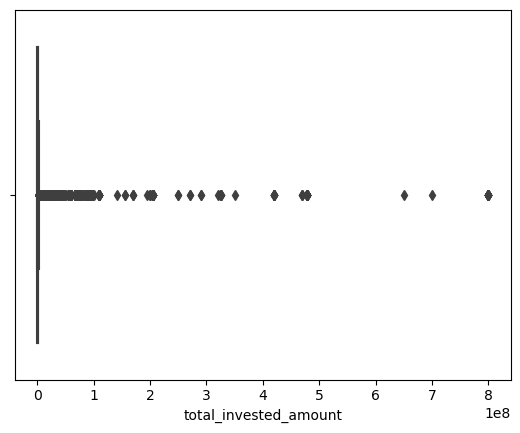

In [47]:
# Cheking the data distribution of the merged_df data by 'total_invested_amount'
# because this column shows the sum of all transaction done by the users

sns.boxplot(data = merged_df , x = 'total_invested_amount')

In [48]:
df_clean = merged_df.copy()

# Calculating Quartile 1 dan 3
Q1 = df_clean['total_invested_amount'].quantile(0.25)
Q3 = df_clean['total_invested_amount'].quantile(0.75)

# Calculating Interquartile Range
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',LB)
print('\nMax:\n',UB)

Q1:
 100451.0

Q3:
 1350000.0

IQR:
 1249549.0

Min:
 -1773872.5

Max:
 3224323.5


In [49]:
# Eleminating the outliers and assigning to a new variable called "df_cleaned"
df_cleaned= merged_df[~((merged_df['total_invested_amount'] < LB) | (merged_df['total_invested_amount'] > UB))]

df_cleaned.shape

(15465, 27)

In [50]:
# Checking whether it is really clean

df_cleaned[(df_cleaned['total_invested_amount'] < LB)].sort_values('total_invested_amount', ascending = False)

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount


<AxesSubplot:xlabel='total_invested_amount'>

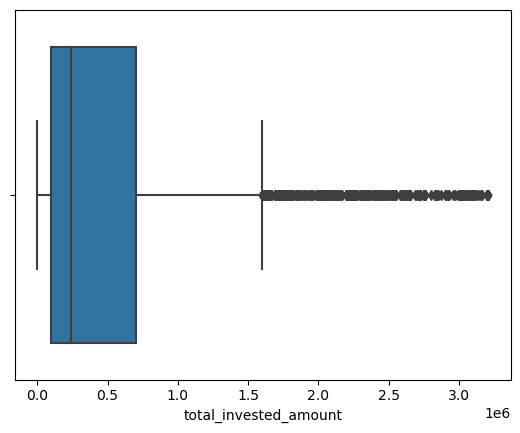

In [51]:
# Cheking the data distribution of the df_cleaned

sns.boxplot(data = df_cleaned , x ='total_invested_amount')



> As shown by the boxplot above, there are still many outliers in the dataset. Therefore, I would like to do another outliers removal to get a better distribution.

***Second Phase for outliers Removal***

In [52]:
df_out_clean = df_cleaned.copy()

# Calculating Quartile 1 dan 3
Q1 = df_cleaned['total_invested_amount'].quantile(0.25)
Q3 = df_cleaned['total_invested_amount'].quantile(0.75)

# Calculating Interquartile Range
IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',LB)
print('\nMax:\n',UB)

Q1:
 100000.0

Q3:
 700000.0

IQR:
 600000.0

Min:
 -800000.0

Max:
 1600000.0


In [53]:
# Eleminating the outliers and assigning it to a new variable "df_out_clean"
df_out_cleaned= df_out_clean[~((df_out_clean['total_invested_amount'] < LB) | (df_out_clean['total_invested_amount'] > UB))]

<AxesSubplot:xlabel='total_invested_amount'>

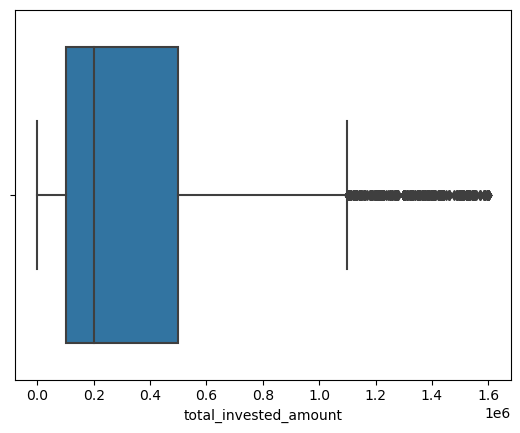

In [54]:
# Cheking the data distribution of the df_out_cleaned data for 'total_invested_amount'
sns.boxplot(data = df_out_cleaned , x ='total_invested_amount')

In [55]:
df_out_cleaned.shape

(14014, 27)

**Insight:**
 

*   The df_out_cleaned has a better distribution with a few noises.
*   There were 18193-14014 = 4179 outliers in the merged_df.



# D. EDA

## a. EDA Preparation

In [56]:
# Make a copy of df_out_cleaned for EDA
dfEDA = df_out_cleaned.copy()
dfEDA.head()

,user_id,registration_import_datetime,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source,end_of_month_invested_amount,total_buy_amount,...,sell_pendapatan_tetap_transaction_amount,buy_campuran_transaction_amount,sell_campuran_transaction_amount,total_buy_transaction_amount,total_sell_transaction_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
0,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,370000.0,100000.0,530000.0,NaN,1000000
8,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,-949569.0,NaN,NaN,0,-1889569,0.0,0.0,110431.0,NaN,110431
9,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,0.0,0.0,110431.0,NaN,110431
10,3783302,2021-09-14 08:16:54,Male,Adult,Swasta,Middle Income,Did not use referral,Gaji,110431.0,1000000.0,...,NaN,NaN,NaN,0,0,0.0,0.0,110431.0,NaN,110431
52,3733536,2021-08-01 11:11:20,Female,Adult,Swasta,Lower Income,Did not use referral,Hasil Investasi,4914373.0,18724000.0,...,NaN,NaN,NaN,0,0,NaN,500000.0,NaN,NaN,500000


In [57]:
dfEDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14014 entries, 0 to 18155
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   14014 non-null  object        
 1   registration_import_datetime              14014 non-null  datetime64[ns]
 2   user_gender                               14014 non-null  object        
 3   user_age                                  14014 non-null  object        
 4   user_occupation                           14014 non-null  object        
 5   user_income_range                         14014 non-null  object        
 6   referral_code_used                        14014 non-null  object        
 7   user_income_source                        14014 non-null  object        
 8   end_of_month_invested_amount              14014 non-null  float64       
 9   total_buy_amount            

## b. Descriptive Statistics



*   How many users do we have in the data?
*   How is the demographic in the data?
*   How many users buy products in each mutual fund?
*   Which user ocupation made the highest total buy transaction amount?
*   Which user age made the highest total buy transaction amount?
*   Which user gender with the highest total amount of investment?

### 1. Descriptive information about numeric variables

In [58]:
#Descriptive analysis after treating the outlier
pd.set_option('display.float_format', lambda x: '%.3f' % x)

num = ['end_of_month_invested_amount', 'saham_invested_amount', 'pasar_uang_invested_amount', 
'pendapatan_tetap_invested_amount', 'campuran_invested_amount', 'total_invested_amount' ]

desc_eda = dfEDA[num].describe()
desc_eda.loc['kurtosis'] = dfEDA[num].kurt() #show kurtosis statistic
desc_eda.loc['skewness'] = dfEDA[num].skew() #show Skewness statistic
desc_eda.loc['variance'] = dfEDA[num].var() #show variance statistic
desc_eda.round(2)

,end_of_month_invested_amount,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount,total_invested_amount
count,14014.000,11923.000,13134.000,11665.000,393.000,14014.000
mean,1465954.670,133889.460,117385.760,141134.130,573282.440,357480.960
std,22679064.250,190865.150,208519.860,191386.880,465148.830,378731.280
min,114.000,0.000,0.000,0.000,0.000,0.000
25%,100000.000,10000.000,10000.000,25000.000,100000.000,100000.000
50%,270000.000,60000.000,40000.000,70000.000,500000.000,200000.000
75%,750000.000,180000.000,110000.000,185000.000,1000000.000,500000.000
max,800000751.000,1600000.000,1600000.000,1500000.000,1500000.000,1600000.000
kurtosis,1207.020,7.780,13.720,7.420,-1.330,1.000
skewness,34.490,2.520,3.390,2.470,0.240,1.370


**Insight**
*   The average number of total invested amout is 357481 USD, the median is 200000, with minumum of 0 and the maximum is 1600000
*   This output displays that the highest median of amount invested is from **Pendapatan Tetap** compared to the others which amounted to 70000 USD.
*   On average, the amount of saham invested is 133889.460 USD, with minimum of 0 and maximum of 1600000.
*   The average amount of pasar uang invested is 117385.760, the median is 40000, and the maximum amount is 1600000
*   The average amount of pendapatan tetap invested is 141134.130, the median is 70000, and the maximum amount is 1500000
*   The average amount of campuran invested is 573282.440, the median is 500000, and the maximum amount is 1500000

### 2. Descriptive information about string variables

In [59]:
str_objects = ['user_id',
               'user_gender',
               'user_age',
               'user_occupation',
               'user_income_range',
               'referral_code_used',
               'user_income_source',
               ]
            
dfEDA[str_objects].describe()

,user_id,user_gender,user_age,user_occupation,user_income_range,referral_code_used,user_income_source
count,14014,14014,14014,14014,14014,14014,14014
unique,671,2,3,3,3,2,9
top,3732132,Male,Young Adult,Pelajar,Lower Income,Did not use referral,Gaji
freq,42,9291,10716,8108,10944,10259,8627


**Insight:**

*   The number of user id is 14014 users, with 671 unique user IDs
*   User with id of 3732132 made transactions for 42 times
*   Our customer is dominated by **Male** users with frequcy of 9291 users
*   **Young Adult** is the top group of our user age with freq of 10716
*   Our users occupation is dominated by **Pelajar** with freq of 8108 users
*   User income range is dominated by **Lower Income** group which come from 10944 users 
*   10259 users **did not use referral**
*   Income source is topped by **Gaji** used by 8627 users

### 3. Descriptive information about date variables

In [60]:
dfEDA['registration_import_datetime'].describe()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\3402732473.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dfEDA['registration_import_datetime'].describe()


count                   14014
unique                    657
top       2021-08-15 16:56:15
freq                       62
first     2021-08-01 00:11:14
last      2021-09-24 10:41:45
Name: registration_import_datetime, dtype: object

**Insight:** The data used from date 2021-08-01 to 2021-09-24.

### 4. Number of customers in the data

In [61]:
# Calculating the number of customers

dfEDA['user_id'].nunique()

671

**Insight:**


> There are 671 users invested in mutual funds from Agust 2021 to September 2021

### 5. Demographic of The Data

> Demographic data is often utilized to understand the composition of a population and to identify patterns and trends that may be related to specific demographic groups. It usually refers to age, gender, education level, income, employment status, etc.


In [62]:
# Exploring the users demographic

for col_name in ['user_gender', 'user_age',
       'user_occupation', 'user_income_range',
       'user_income_source']:
    print(df_user[col_name].value_counts(), '\n')

Male      473
Female    257
Name: user_gender, dtype: int64 

Young Adult    526
Adult          203
Older Adult      1
Name: user_age, dtype: int64 

Pelajar    395
Swasta     185
Others     150
Name: user_occupation, dtype: int64 

Lower Income     519
Middle Income    200
Higher Income     11
Name: user_income_range, dtype: int64 

Gaji                     476
Undian                    94
Keuntungan Bisnis         73
Dari Orang Tua / Anak     32
Tabungan                  24
Lainnya                   17
Hasil Investasi            8
Dari Suami / istri         4
Warisan                    2
Name: user_income_source, dtype: int64 



**Insight:**


*   There are 473 Male users and 257 Female users
*   User age is dominated by Young Adult by 526 users. Followed by adult by 203 users, and lastly by older adult by 1 user
*   User occupation is dominated by **Pelajar** by 395 users, second highest is **Swasta** by 185 users, and the third is Other occupation by 150 users
*   Most of our users come from **Lower income** group by 519 users, followed by Middle income group by 200 users, and the last Higher income group by 11 users
*   **Gaji** is the highest income source used by our users which is 476 users, followed by **Undian** by 94 users and **Keuntungan bisnis** by 73 users.

### 6. Number of Users Purchased a Product in Each Mutual Fund

In [63]:
# To find the number of users who made a purchase for every mutual fund type

for col in ['buy_saham_transaction_amount', 
            'buy_pasar_uang_transaction_amount', 
            'buy_pendapatan_tetap_transaction_amount', 
            'buy_campuran_transaction_amount']:
    print(f"Number of users who made a purchase for {col}:")
    print(dfEDA.loc[dfEDA[col].notnull(), 'user_id'].nunique())

Number of users who made a purchase for buy_saham_transaction_amount:
587
Number of users who made a purchase for buy_pasar_uang_transaction_amount:
621
Number of users who made a purchase for buy_pendapatan_tetap_transaction_amount:
561
Number of users who made a purchase for buy_campuran_transaction_amount:
24


**Insight:**
As shown by the output above, ***pasar uang*** is the most bought type of mutual fund by 621 users. Followed by ***saham*** by 587 users, then ***pendapatan tetap*** by 561 users, and the last who bought ***campuran*** by only 24 users. 

**Recommendation:**
Since many of our users buy ***Pasar Uang***, it is recommended to offer certain promotion or discount for them for multiple transactions. It is expected to attract more users to make a purchase that eventually will increase our profit.

### 7. User occupation made the highest total buy transaction amount

In [64]:
dfEDA['user_occupation'].value_counts()

Pelajar    8108
Swasta     3302
Others     2604
Name: user_occupation, dtype: int64

In [65]:
# To group user occupation based on 'total_buy_amount' sorted (DESC) and number of unique user_id

user_occup_tot= dfEDA.groupby(['user_occupation', 'user_id'])['total_buy_amount'].sum().reset_index().groupby('user_occupation').agg({'total_buy_amount': 'sum', 'user_id': 'nunique'}).sort_values('total_buy_amount', ascending=False)
print(user_occup_tot)

                 total_buy_amount  user_id
user_occupation                           
Swasta            13140281973.000      163
Pelajar            6551127085.000      375
Others             4283508127.000      133


**Insight:** As we can see, **Swasta** is the user occupation that made the highest buy amount which amounting to 13140281973 by 163 unique users. Followed by **Pelajar** as the second highest with the total buy amount of 6551127085 by 375 unique users, and so on.

**Recommendation**: From the output above, even though **Pelajar** is the occupation of our users who made the second highest total buy amount, this age group is the one that made the most transactions. Therefore, it is recommended to offer them certain campaign or discounts as they more likely do not make money by themselves yet. Moreover, focusing on giving improved service to *swasta* age group to keep them using our service as well as attract more of them, therefore our profit will be increased.

### 8. Age Group That Made The Highest Purchase

In [66]:
# To group user age based on 'total_buy_amount' sorted (DESC) and number of unique user_id

age_group_tot= dfEDA.groupby(['user_age', 'user_id'])['total_buy_amount'].sum().reset_index().groupby('user_age')['total_buy_amount', 'user_id'].agg({'total_buy_amount': 'sum', 'user_id': 'nunique'}).sort_values('total_buy_amount', ascending=False)
print(age_group_tot)

             total_buy_amount  user_id
user_age                              
Adult         15424647525.000      176
Young Adult    8550094660.000      494
Older Adult        175000.000        1


C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2144818768.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_group_tot= dfEDA.groupby(['user_age', 'user_id'])['total_buy_amount'].sum().reset_index().groupby('user_age')['total_buy_amount', 'user_id'].agg({'total_buy_amount': 'sum', 'user_id': 'nunique'}).sort_values('total_buy_amount', ascending=False)


**Insight:**
The output above shows that users who made the highest purchase are from Adult age group with the total buy amount of 15424647525 and total unique users of 176 users. The second highest is from Young Adult group and the lowest is from Older Adult group. This situation happened might be because Adults are experienced in investing industries. They tend to diversify their portfolio by investing in a more secure instrument than stocks like mutual fund. On the other hand, young adult group has slightly lower total buy amount than adult group because this age group more likely have not made money by themselves.


**Recommendation** Therefore, I recommend the company to give any special offers for the Adults as this age group made the highest purhcase amount of mutual fund and we intend to increase the number by attracting them with interesting offers. For example, giving discounts or cash back.


### 9. User Gender with the Highest Total Investment

In [67]:
# To find which gender that has the highest total amount invested
user_gender_tot = dfEDA.groupby(['user_gender', 'user_id'])['total_invested_amount'].sum().reset_index().groupby('user_gender')['total_invested_amount', 'user_id'].agg({'total_invested_amount': 'sum', 'user_id': 'nunique'}).sort_values('total_invested_amount', ascending=False)
print(user_gender_tot)

             total_invested_amount  user_id
user_gender                                
Male                    3327791387      440
Female                  1681946730      231


C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2643575390.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  user_gender_tot = dfEDA.groupby(['user_gender', 'user_id'])['total_invested_amount'].sum().reset_index().groupby('user_gender')['total_invested_amount', 'user_id'].agg({'total_invested_amount': 'sum', 'user_id': 'nunique'}).sort_values('total_invested_amount', ascending=False)


**Insight:** The output above shows that Male is the gander that invests with the highest total amount, at 3327791387 by 440 unique user ids. On the other hand, Female invests slightly lower than Male which amounting to 1681946730 by 231 unique user ids.

**Recommendation**: Since the total investment amount of both genders are relatively high, we can focus on giving better service and offers to keep these users and even attract new users to invest.

## c. Finfing Patterns

1. Trend on the transaction
2. Transaction trends for each product

#### a. Trend on transaction amount by monthly and daily

#### 1.Total buy transaction trend

- Monthly

In [68]:
# Find the buy trend on monthly
buy_trend = dfEDA[['date', 'total_buy_transaction_amount']]    #Choose the variables needed to make the chart
buy_trend['year_month'] = buy_trend['date'].dt.strftime('%Y/%m')   #Change the date into year,month format to get monthly data

buy_trend = buy_trend.sort_values('date')  #Sort the values by the date on ascending
buy_trend = buy_trend.groupby('year_month').sum() #sum the data and group it by the year_month
buy_trend = buy_trend.reset_index()
buy_trend.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\1267070366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_trend['year_month'] = buy_trend['date'].dt.strftime('%Y/%m')   #Change the date into year,month format to get monthly data


,year_month,total_buy_transaction_amount
0,2021/08,66444397
1,2021/09,176861765


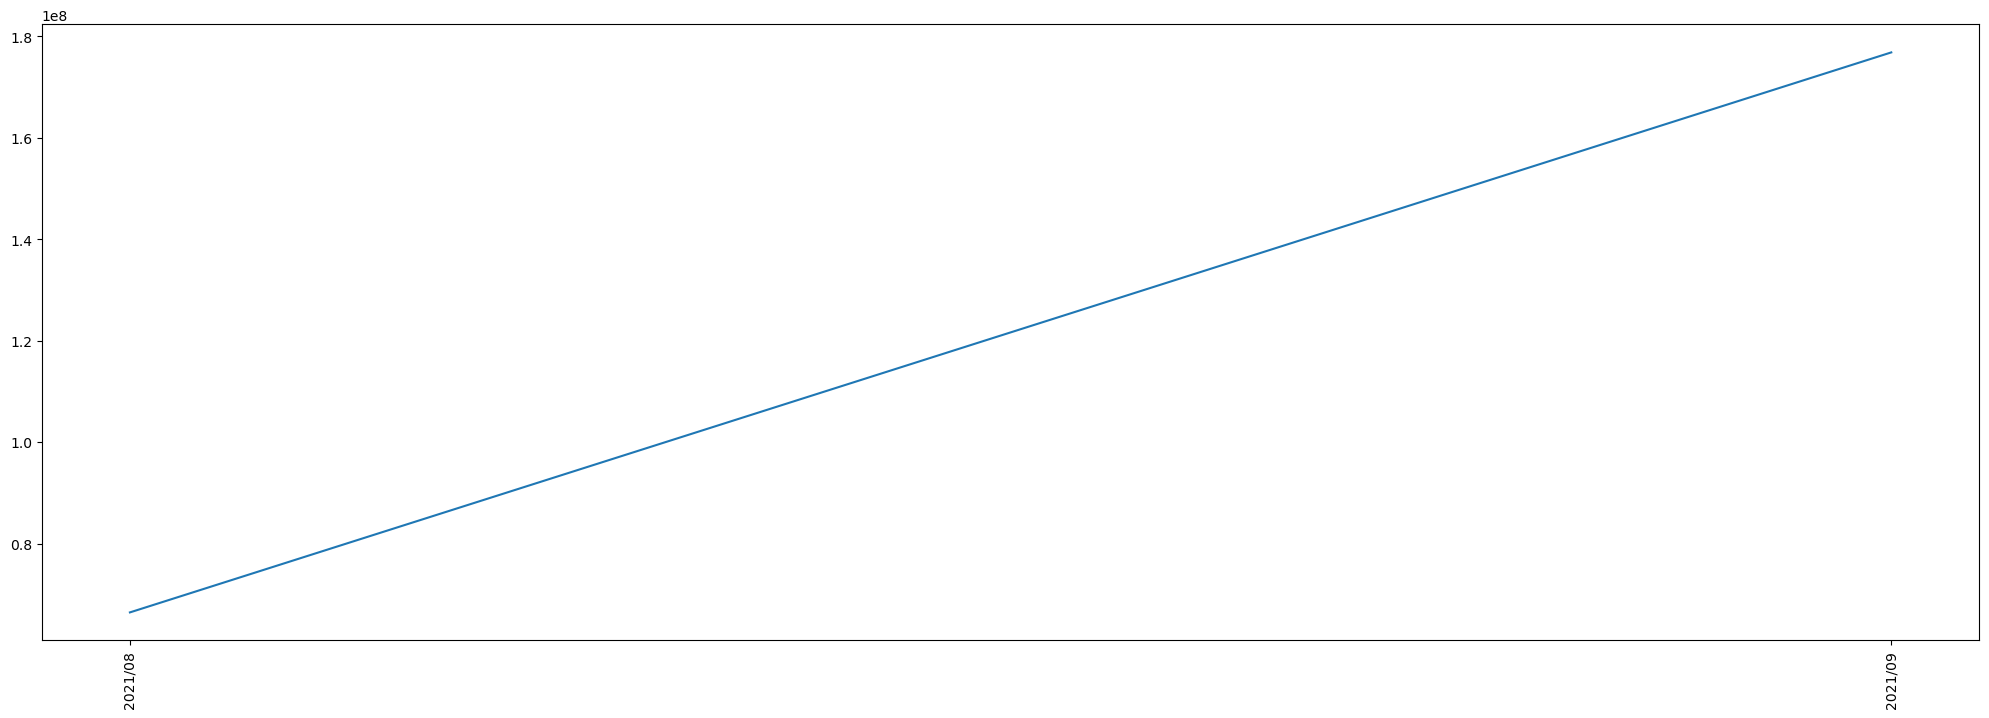

In [69]:
# Monthly Line Chart
plt.figure(figsize =(25, 8))

plt.xticks(rotation = 90)
plt.plot(buy_trend['year_month'], buy_trend['total_buy_transaction_amount'])

plt.show()

- Daily

In [70]:
# Chechking for daily buy transaction trend

daily_buy_trend = dfEDA[['date', 'total_buy_transaction_amount']]    #Choose the variable needed to make the chart
daily_buy_trend['daily'] = daily_buy_trend['date'].dt.strftime('%d')   #Change the date into day format for to get daily data

daily_buy_trend = daily_buy_trend.sort_values('date')  #Sort the values by the date on ascending
daily_buy_trend = daily_buy_trend.groupby('daily').sum() #sum the data and group it by the daily
daily_buy_trend = daily_buy_trend.reset_index()

daily_buy_trend.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\980790928.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_buy_trend['daily'] = daily_buy_trend['date'].dt.strftime('%d')   #Change the date into day format for to get daily data


,daily,total_buy_transaction_amount
0,01,12598771
1,02,4456875
2,03,9036527
3,04,0
4,05,650000


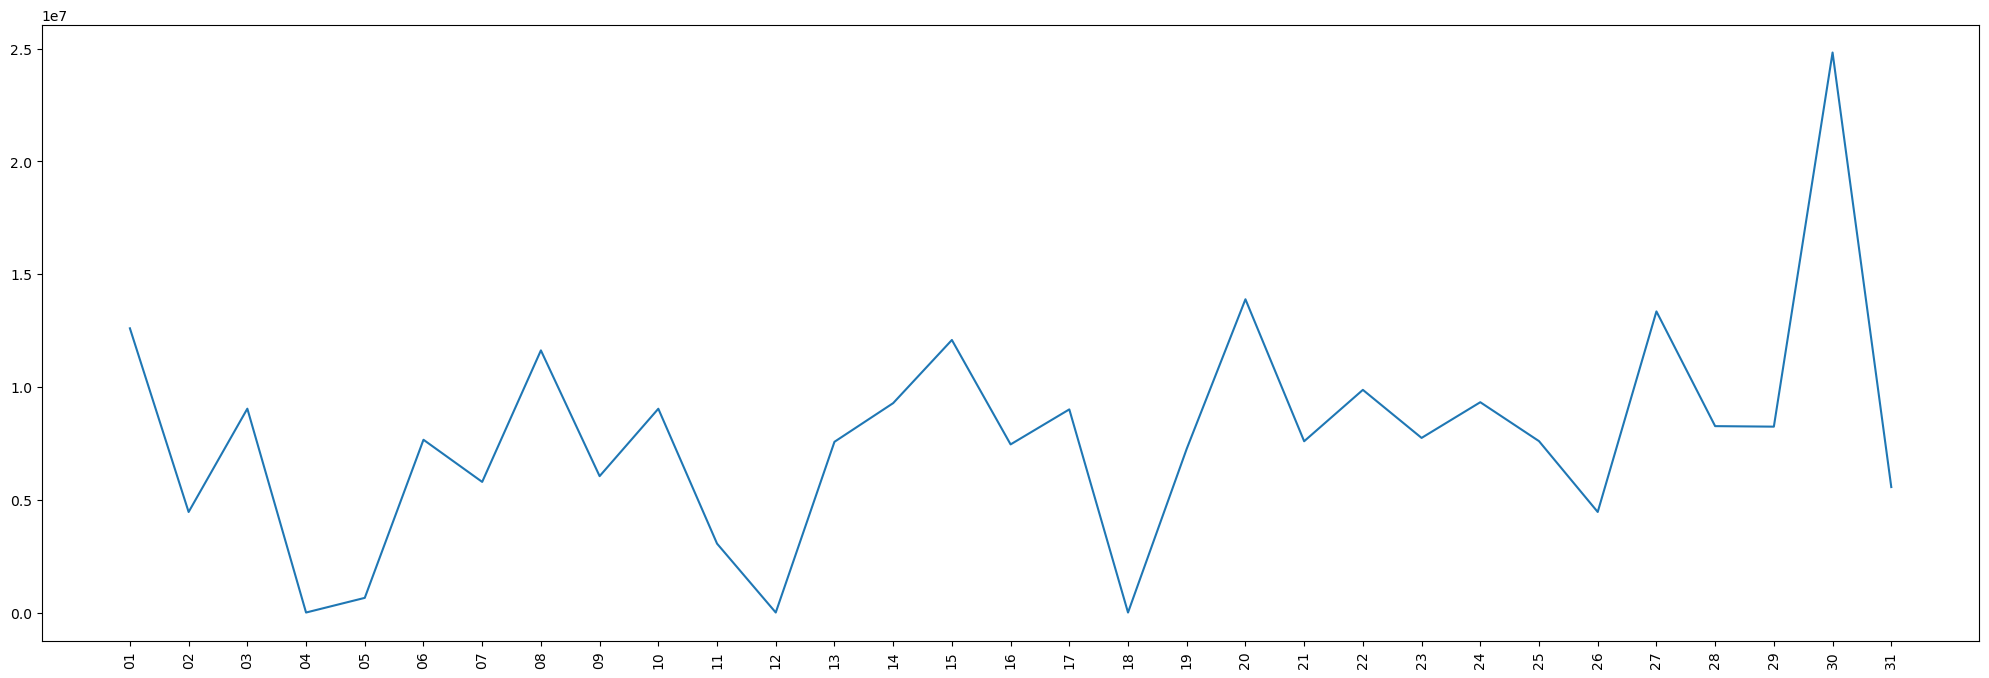

In [71]:
plt.figure(figsize =(25, 8))

plt.xticks(rotation = 90)
plt.plot(daily_buy_trend['daily'], daily_buy_trend['total_buy_transaction_amount'])

plt.show()

**Insight:**
- By monthly, we can see that the trend is an up-trend, from 66444397 on August 2021 to 176861765 on September 2021. This indicates that more users invested in mutual funds on this date range. It might be caused by the needs of our users to earn passive income or to generate better returns than the interest given by saving bank accounts.
- By daily,  there is no specific trend shown. However, for both months on date 30, those were the date where our users bought the highest amount of mutual funds

**Recommendation:**
Since the highest amount of buy transaction happened on the end of a month, giving a marketing campaign on this date is expected to be successful.

#### 2. Total sell transaction trend

- Monthly

In [72]:
sell_trend = dfEDA[['date', 'total_sell_transaction_amount']]    #Choose the variables needed to make the chart
sell_trend['ym'] = sell_trend['date'].dt.strftime('%Y/%m')   #Change the date into year,month format to get monthly data

sell_trend = sell_trend.sort_values('date', ascending=False)  #Sort the values by the date on descending
sell_trend = sell_trend.groupby('ym').sum() #sum the data and group it by the year_month
sell_trend = sell_trend.reset_index()
sell_trend.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\862317222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_trend['ym'] = sell_trend['date'].dt.strftime('%Y/%m')   #Change the date into year,month format to get monthly data


,ym,total_sell_transaction_amount
0,2021/08,-69593600
1,2021/09,-390641234


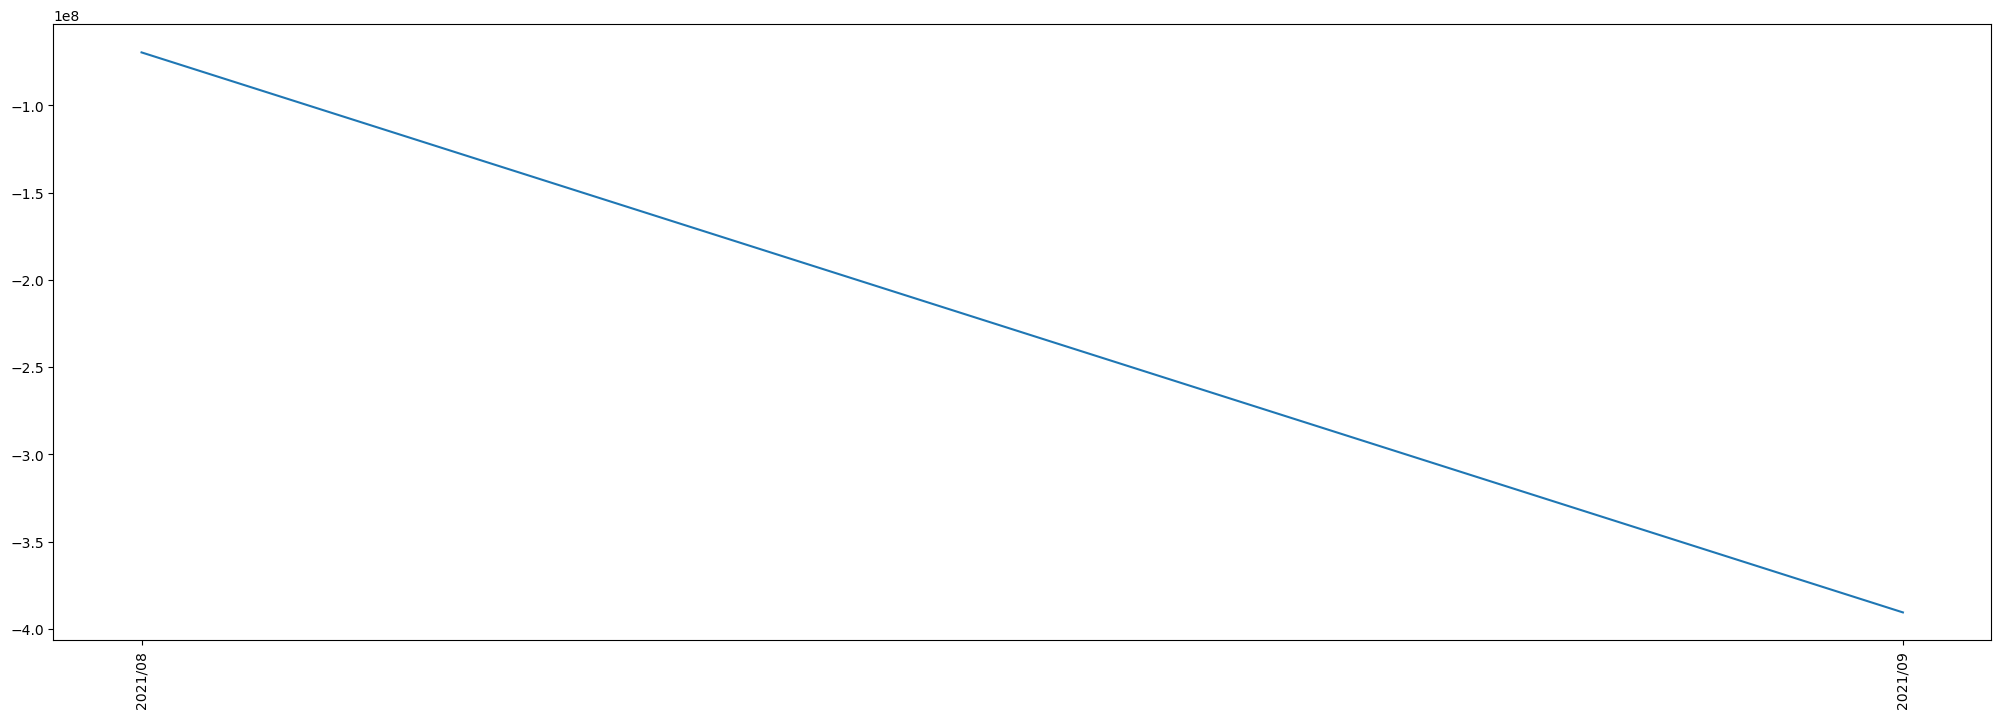

In [73]:
plt.figure(figsize =(25, 8))

plt.xticks(rotation = 90)
plt.plot(sell_trend['ym'], sell_trend['total_sell_transaction_amount'])

plt.show()

- Daily

In [74]:
# Chechking for daily sell transaction trend

daily_sell_trend = dfEDA[['date', 'total_sell_transaction_amount']]    #Choose the variable needed to make the chart
daily_sell_trend['daily'] = daily_sell_trend['date'].dt.strftime('%d')   #Change the date into day format for to get daily data

daily_sell_trend = daily_sell_trend.sort_values('date')  #Sort the values by the date on ascending
daily_sell_trend = daily_sell_trend.groupby('daily').sum() #sum the data and group it by daily
daily_sell_trend = daily_sell_trend.reset_index()

daily_sell_trend.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\2486368058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_sell_trend['daily'] = daily_sell_trend['date'].dt.strftime('%d')   #Change the date into day format for to get daily data


,daily,total_sell_transaction_amount
0,01,-4788487
1,02,-23814137
2,03,-4689820
3,04,0
4,05,0


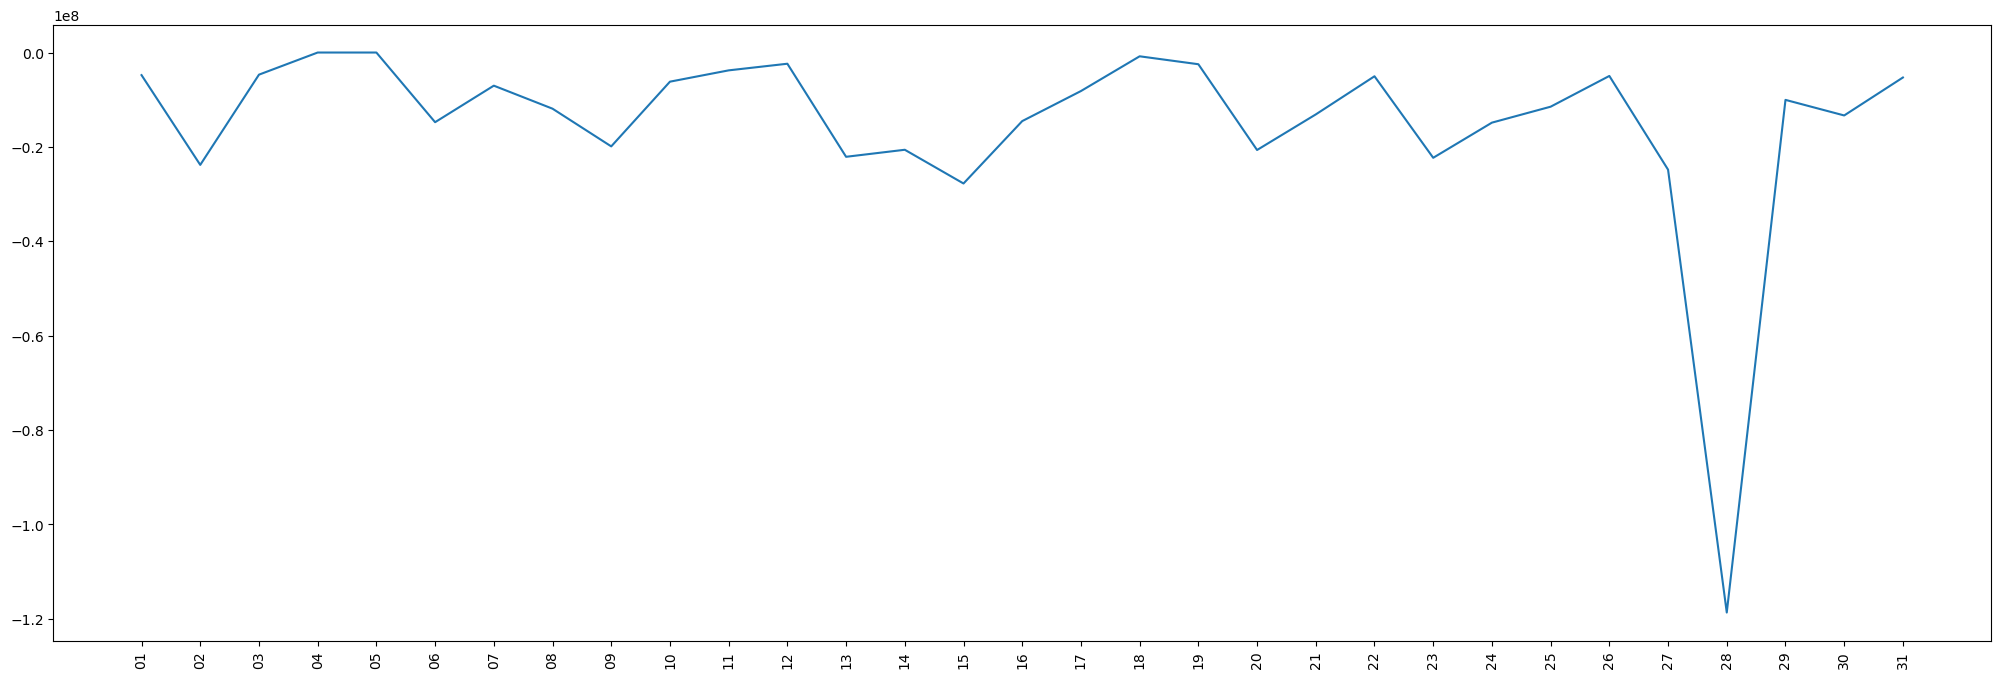

In [75]:
plt.figure(figsize =(25, 8))

plt.xticks(rotation = 90)
plt.plot(daily_sell_trend['daily'], daily_sell_trend['total_sell_transaction_amount'])

plt.show()

**Insight:**

- By monthly, we can see that the trend is a down-trend, from -69593600 on August 2021 to -390641234 on September 2021. This indicates that more peole sold their mutual funds on this date range. It might be caused by the ecconomic situation in Indonesia in 2021, as we were still in the middle of a pandamiic. People were selling their investment in order to fund their businesses or living costs.
- By daily,  there is no specific trend shown. However, on date 28 in both months there was a big amount sold by our users at -1.2.

**Recommendation:**
It is recommended to make more appealing marketing campaign at the end of every month to keep the users invest with us.





#### b.Trend on each mutual funds

#### 1. Which user occupation has the highest invested amount in saham

In [76]:
occ_df = dfEDA.copy()
# Drop null values from the saham_invested_amount column
occ_df = occ_df.dropna(subset=['saham_invested_amount'])

# Group the data by occupation and sum the saham invested amount for each occupation
occupation_saham = occ_df.groupby('user_occupation')['saham_invested_amount'].sum()

# Sort the saham invested amounts in descending order
occupation_saham = occupation_saham.sort_values(ascending=False)

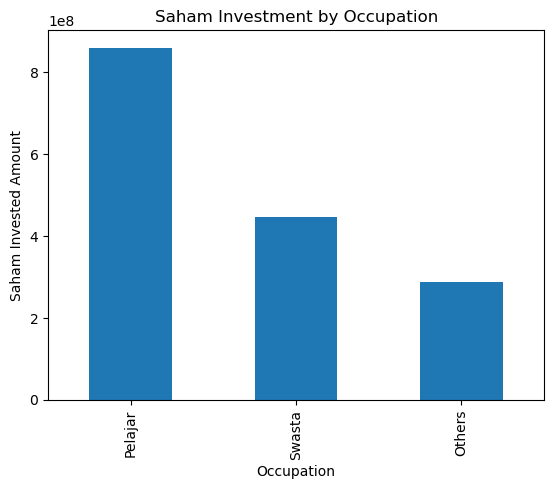

In [77]:
# Create a bar chart to display the results
occupation_saham.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Saham Invested Amount')
plt.title('Saham Investment by Occupation')
plt.show()

**Insight:**
- **Pelajar** is the user occupation that has the highest investment amount in Stock


#### 2. Age trend for each mutual funds invested amount

In [78]:
dfEDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14014 entries, 0 to 18155
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   user_id                                   14014 non-null  object        
 1   registration_import_datetime              14014 non-null  datetime64[ns]
 2   user_gender                               14014 non-null  object        
 3   user_age                                  14014 non-null  object        
 4   user_occupation                           14014 non-null  object        
 5   user_income_range                         14014 non-null  object        
 6   referral_code_used                        14014 non-null  object        
 7   user_income_source                        14014 non-null  object        
 8   end_of_month_invested_amount              14014 non-null  float64       
 9   total_buy_amount            

In [79]:
# Pick variable that wanted to be analyzed
age_trend = dfEDA[['date', 'user_age','saham_invested_amount', 'pasar_uang_invested_amount', 
                     'pendapatan_tetap_invested_amount', 'campuran_invested_amount']]   

# Change the format into year-month
age_trend['date'] = age_trend['date'].dt.strftime('%Y/%m')    
age_trend.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_9556\4115255691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_trend['date'] = age_trend['date'].dt.strftime('%Y/%m')


,date,user_age,saham_invested_amount,pasar_uang_invested_amount,pendapatan_tetap_invested_amount,campuran_invested_amount
0,2021/09,Adult,370000.000,100000.000,530000.000,NaN
8,2021/09,Adult,0.000,0.000,110431.000,NaN
9,2021/09,Adult,0.000,0.000,110431.000,NaN
10,2021/09,Adult,0.000,0.000,110431.000,NaN
52,2021/08,Adult,NaN,500000.000,NaN,NaN


In [80]:
# Change the user_age into a column using pivot
age_trend_pivot = age_trend.pivot_table(index = 'date', columns='user_age', values = ['saham_invested_amount', 
                                                                                      'pasar_uang_invested_amount', 
                                                                                      'pendapatan_tetap_invested_amount',
                                                                                      'campuran_invested_amount'],aggfunc = 'sum') # Pivot the table and sum if there is a duplicate found
age_trend_pivot = age_trend_pivot.reset_index() 
age_trend_pivot.head()

date campuran_invested_amount                            \
user_age                             Adult Older Adult   Young Adult   
0         2021/08             19600000.000         NaN  75500000.000   
1         2021/09             25300000.000       0.000 104900000.000   

         pasar_uang_invested_amount                            \
user_age                      Adult Older Adult   Young Adult   
0                      93157343.000         NaN 298298886.000   
1                     236684727.000       0.000 913603557.000   

         pendapatan_tetap_invested_amount                            \
user_age                            Adult Older Adult   Young Adult   
0                           140870972.000         NaN 256845162.000   
1                           375574146.000  235000.000 872804307.000   

         saham_invested_amount                            
user_age                 Adult Older Adult   Young Adult  
0                123457633.000         NaN 278890746.000  
1                358434337.000  133516.000 835447785.000

In [81]:
# Make a list of the columns
age_trend_pivot.columns.to_list()

[('date', ''),
 ('campuran_invested_amount', 'Adult'),
 ('campuran_invested_amount', 'Older Adult'),
 ('campuran_invested_amount', 'Young Adult'),
 ('pasar_uang_invested_amount', 'Adult'),
 ('pasar_uang_invested_amount', 'Older Adult'),
 ('pasar_uang_invested_amount', 'Young Adult'),
 ('pendapatan_tetap_invested_amount', 'Adult'),
 ('pendapatan_tetap_invested_amount', 'Older Adult'),
 ('pendapatan_tetap_invested_amount', 'Young Adult'),
 ('saham_invested_amount', 'Adult'),
 ('saham_invested_amount', 'Older Adult'),
 ('saham_invested_amount', 'Young Adult')]

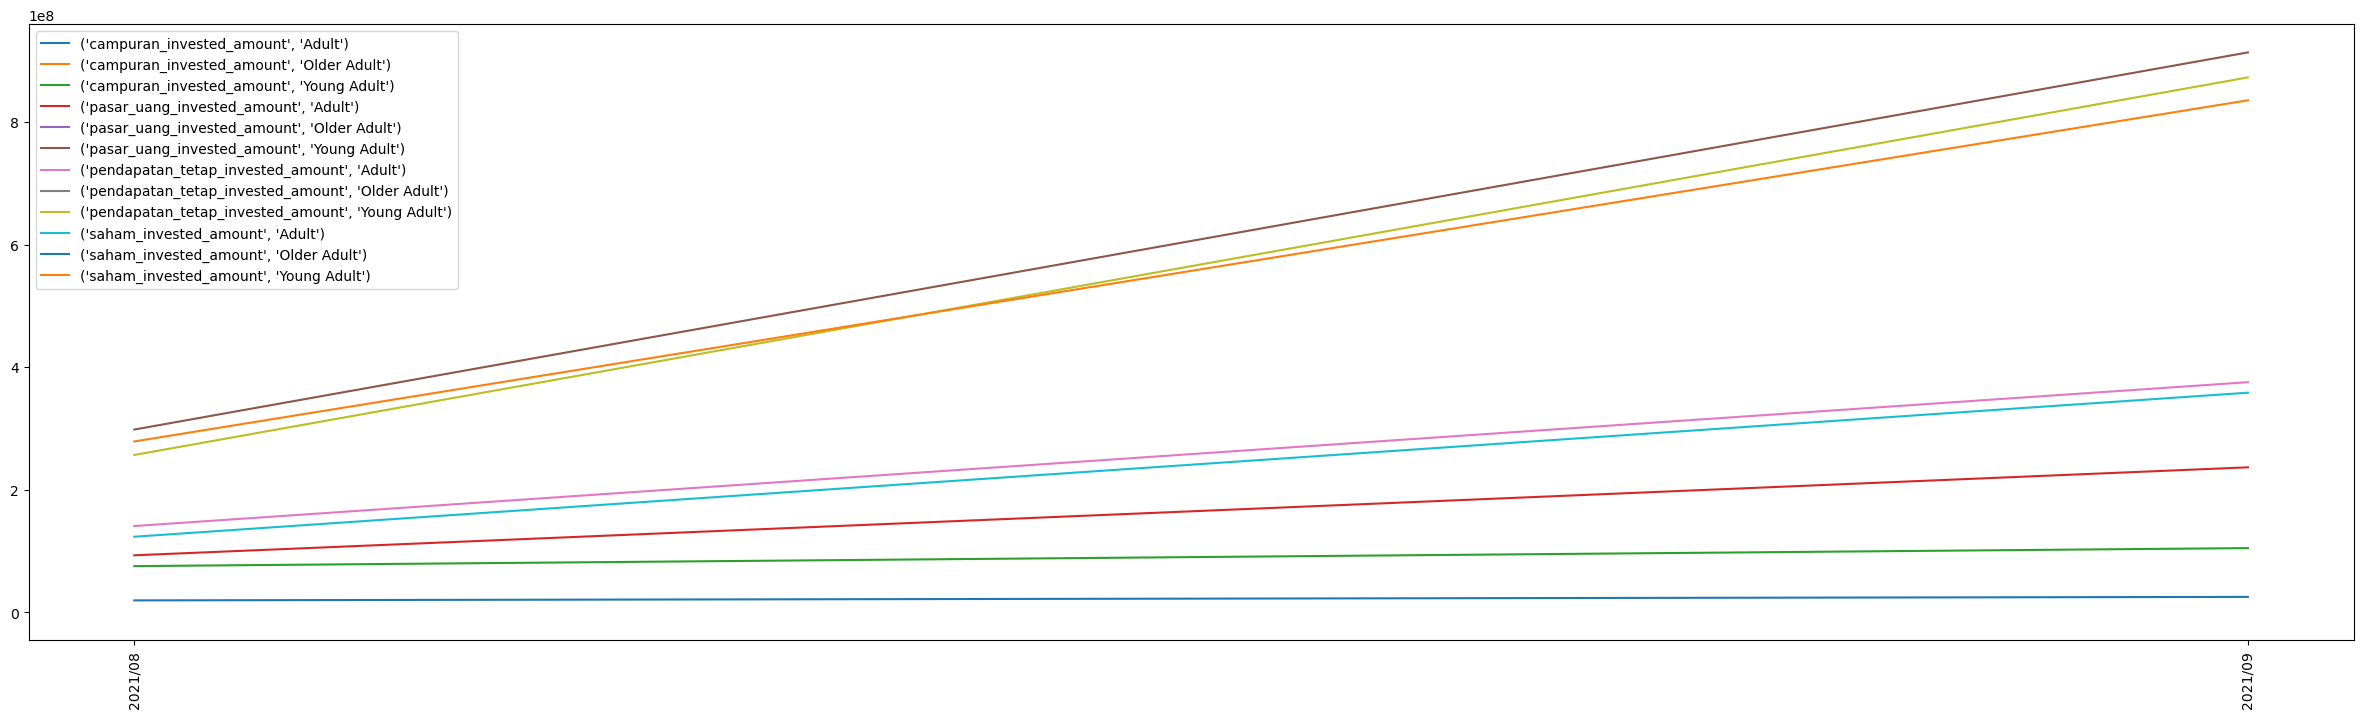

In [82]:
#Create line chart
plt.figure(figsize =(30, 8))
axis = age_trend_pivot.columns.tolist()
#axis.head()

for x in axis[1:]:    
  plt.plot(age_trend_pivot['date'], age_trend_pivot[x])

plt.xticks(rotation = 90)
plt.legend(age_trend_pivot.iloc[:,1:],loc = 2)

plt.show()

**Insight:**
The graph above shows that Young Adult group has the highest amount of investment especially in **Pasar Uang** as shown by the dark purple line and amounted to 75500000 on Aug 2021 and 104900000 on Sept 2021. Moreover, the second highest amount was invested in Stock by Young Adult amounted to 256845162 on Aug 2021 and 872804307 on Sept 2021. On the other hand, the lowest amount invested was in mixed-fund by Adult group which amounted to 19600000 on Aug 2021 and 25300000 on Sept 2021.


**Recommendation:**
Since young adults and students (pelajar) dominate our user's demographic, it is recommended to give a special treatment to this group. By offering attractive promotions according to their lifestyle. For example, giving referral discounts. Young adults are really close to the technology and the internet, so sharing information is effortless. Therefore, showing a marketing campaign about referral discounts on their application interface will trigger them to share about our service, and eventually this campaign will benefit us financially.